In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
# get a list of all available metrics from our system
all_metrics_response = requests.get('http://localhost:8000/metrics')
all_metrics = all_metrics_response.json()
all_metrics

['cloudBase',
 'cloudCeiling',
 'cloudCover',
 'dewPoint',
 'evapotranspiration',
 'freezingRainIntensity',
 'humidity',
 'iceAccumulation',
 'iceAccumulationLwe',
 'precipitationProbability',
 'pressureSurfaceLevel',
 'rainAccumulation',
 'rainAccumulationLwe',
 'rainIntensity',
 'sleetAccumulation',
 'sleetAccumulationLwe',
 'sleetIntensity',
 'snowAccumulation',
 'snowAccumulationLwe',
 'snowDepth',
 'snowIntensity',
 'temperature',
 'temperatureApparent',
 'uvHealthConcern',
 'uvIndex',
 'visibility',
 'weatherCode',
 'windDirection',
 'windGust',
 'windSpeed']

In [3]:
# get list of all geolocations that are in our system
all_geolocations_response = requests.get('http://localhost:8000/geolocations')
all_geolocations = all_geolocations_response.json()
all_geolocations

[{'latitude': '25.8600', 'longitude': '-97.4200'},
 {'latitude': '25.9000', 'longitude': '-97.5200'},
 {'latitude': '25.9000', 'longitude': '-97.4800'},
 {'latitude': '25.9000', 'longitude': '-97.4400'},
 {'latitude': '25.9000', 'longitude': '-97.4000'},
 {'latitude': '25.9200', 'longitude': '-97.3800'},
 {'latitude': '25.9400', 'longitude': '-97.5400'},
 {'latitude': '25.9400', 'longitude': '-97.5200'},
 {'latitude': '25.9400', 'longitude': '-97.4800'},
 {'latitude': '25.9400', 'longitude': '-97.4400'}]

In [4]:
# for each geolocation, get the most recent metric value for all metrics and build object for us to display
latest_metrics_for_locations = {f"{geo['latitude']},{geo['longitude']}": {} for geo in all_geolocations}
for geo in all_geolocations:
    for metric in all_metrics:
        latitude, longitude = geo['latitude'], geo['longitude']
        metric_response = requests.get(f'http://localhost:8000/latest_weather?latitude={latitude}&longitude={longitude}&metric={metric}')
        metric_value = metric_response.json()
        latest_metrics_for_locations[f"{geo['latitude']},{geo['longitude']}"].update(metric_value)
        

In [5]:
"""
Iterate through our location tables and display them using IPython.display for better formatting
This should display the most recent metric value stored in the db for each location and each metric
"""


# Function to create DataFrame for each location
def create_location_table(location_data):
    df = pd.DataFrame(location_data.items(), columns=['Metric', 'Value'])
    return df

# Create tables for each location
location_tables = {location: create_location_table(data) for location, data in latest_metrics_for_locations.items()}

# Display tables
for location, table in location_tables.items():
    print("Location:", location)
    display(table)
    print("\n")

Location: 25.8600,-97.4200


,Metric,Value
0,cloudBase,0.470
1,cloudCeiling,0.470
2,cloudCover,100.000
3,dewPoint,21.500
4,evapotranspiration,0.175
5,freezingRainIntensity,0.000
6,humidity,80.000
7,iceAccumulation,0.000
8,iceAccumulationLwe,0.000
9,precipitationProbability,0.000




Location: 25.9000,-97.5200


,Metric,Value
0,cloudBase,0.530
1,cloudCeiling,0.530
2,cloudCover,100.000
3,dewPoint,21.130
4,evapotranspiration,0.171
5,freezingRainIntensity,0.000
6,humidity,78.000
7,iceAccumulation,0.000
8,iceAccumulationLwe,0.000
9,precipitationProbability,0.000




Location: 25.9000,-97.4800


,Metric,Value
0,cloudBase,0.510
1,cloudCeiling,0.510
2,cloudCover,100.000
3,dewPoint,21.190
4,evapotranspiration,0.171
5,freezingRainIntensity,0.000
6,humidity,79.000
7,iceAccumulation,0.000
8,iceAccumulationLwe,0.000
9,precipitationProbability,0.000




Location: 25.9000,-97.4400


,Metric,Value
0,cloudBase,0.410
1,cloudCeiling,0.410
2,cloudCover,59.000
3,dewPoint,22.500
4,evapotranspiration,0.175
5,freezingRainIntensity,0.000
6,humidity,83.000
7,iceAccumulation,0.000
8,iceAccumulationLwe,0.000
9,precipitationProbability,0.000




Location: 25.9000,-97.4000


,Metric,Value
0,cloudBase,0.400
1,cloudCeiling,0.400
2,cloudCover,59.000
3,dewPoint,22.630
4,evapotranspiration,0.175
5,freezingRainIntensity,0.000
6,humidity,83.000
7,iceAccumulation,0.000
8,iceAccumulationLwe,0.000
9,precipitationProbability,0.000




Location: 25.9200,-97.3800


,Metric,Value
0,cloudBase,0.490
1,cloudCeiling,0.490
2,cloudCover,99.000
3,dewPoint,21.380
4,evapotranspiration,0.175
5,freezingRainIntensity,0.000
6,humidity,80.000
7,iceAccumulation,0.000
8,iceAccumulationLwe,0.000
9,precipitationProbability,0.000




Location: 25.9400,-97.5400


,Metric,Value
0,cloudBase,0.550
1,cloudCeiling,0.550
2,cloudCover,100.000
3,dewPoint,21.130
4,evapotranspiration,0.171
5,freezingRainIntensity,0.000
6,humidity,77.000
7,iceAccumulation,0.000
8,iceAccumulationLwe,0.000
9,precipitationProbability,0.000




Location: 25.9400,-97.5200


,Metric,Value
0,cloudBase,0.550
1,cloudCeiling,0.550
2,cloudCover,100.000
3,dewPoint,21.130
4,evapotranspiration,0.171
5,freezingRainIntensity,0.000
6,humidity,77.000
7,iceAccumulation,0.000
8,iceAccumulationLwe,0.000
9,precipitationProbability,0.000




Location: 25.9400,-97.4800


,Metric,Value
0,cloudBase,0.540
1,cloudCeiling,0.540
2,cloudCover,100.000
3,dewPoint,21.130
4,evapotranspiration,0.171
5,freezingRainIntensity,0.000
6,humidity,78.000
7,iceAccumulation,0.000
8,iceAccumulationLwe,0.000
9,precipitationProbability,0.000




Location: 25.9400,-97.4400


,Metric,Value
0,cloudBase,0.520
1,cloudCeiling,0.520
2,cloudCover,94.000
3,dewPoint,21.380
4,evapotranspiration,0.175
5,freezingRainIntensity,0.000
6,humidity,78.000
7,iceAccumulation,0.000
8,iceAccumulationLwe,0.000
9,precipitationProbability,0.000


In [6]:
# for each geolocation, get an hourly timeseries of of all metrics so that we can display
hourly_metrics_for_locations = {f"{geo['latitude']},{geo['longitude']}": {} for geo in all_geolocations}
for geo in all_geolocations:
    for metric in all_metrics:
        latitude, longitude = geo['latitude'], geo['longitude']
        metric_response = requests.get(f'http://localhost:8000/hourly_weather?latitude={latitude}&longitude={longitude}&metric={metric}')
        metric_values = metric_response.json()
        hourly_metrics_for_locations[f"{geo['latitude']},{geo['longitude']}"][metric] = metric_values

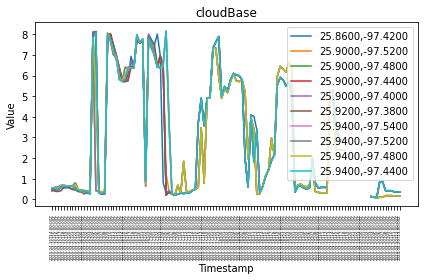

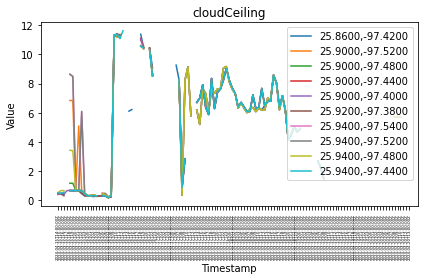

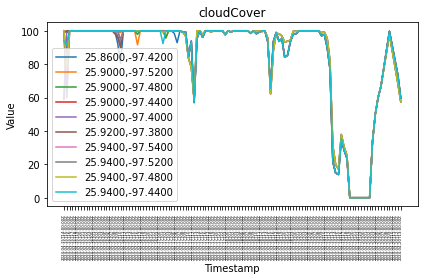

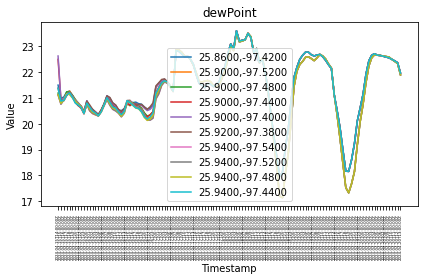

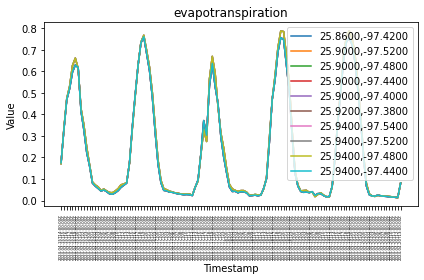

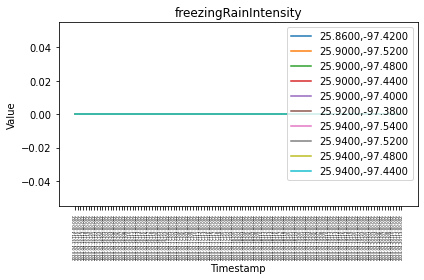

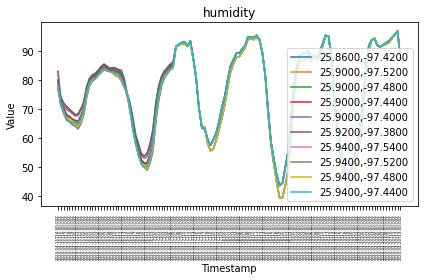

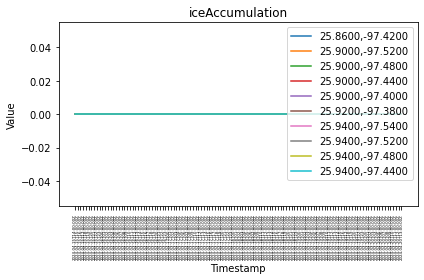

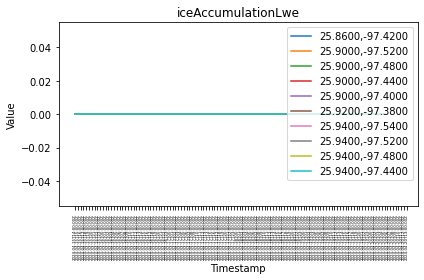

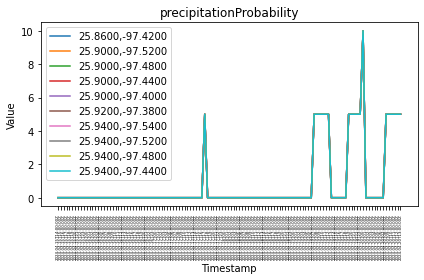

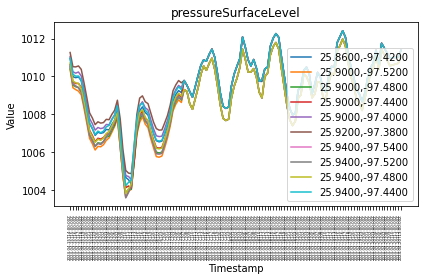

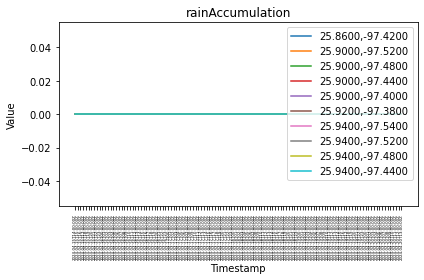

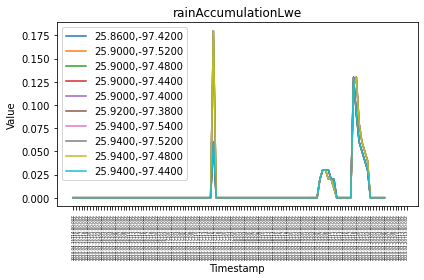

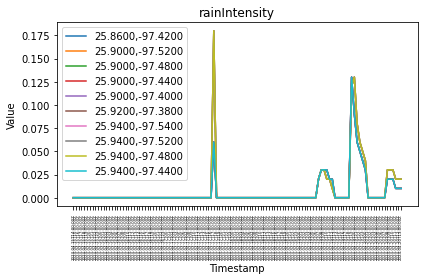

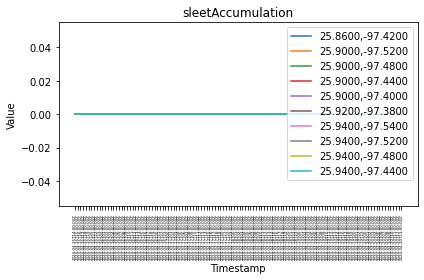

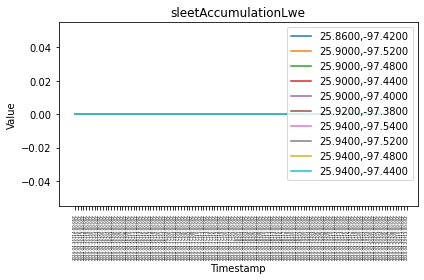

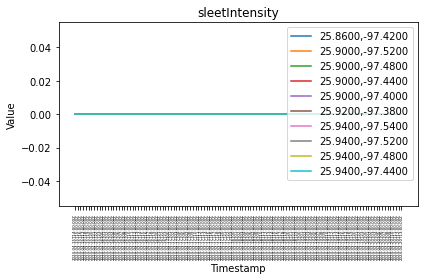

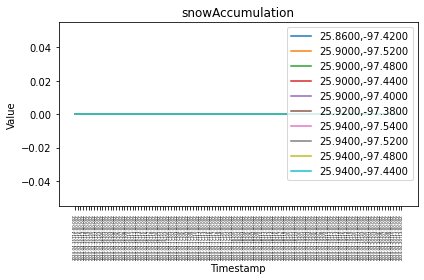

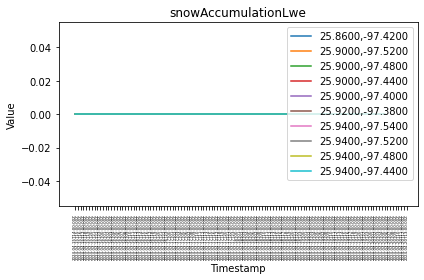

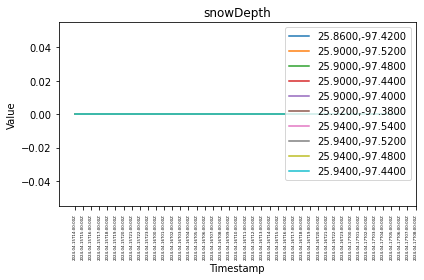

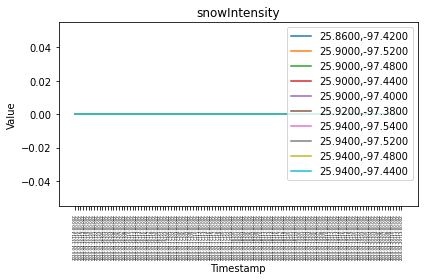

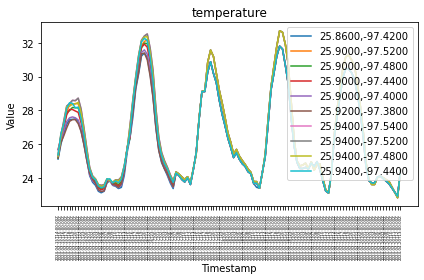

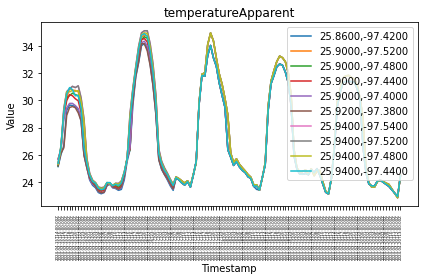

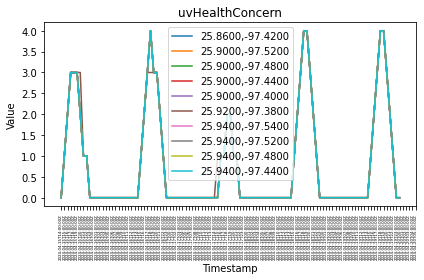

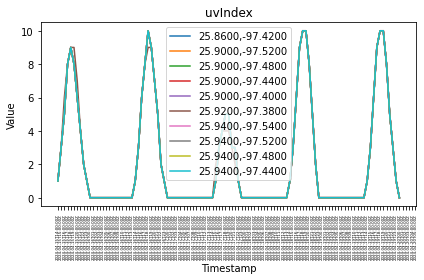

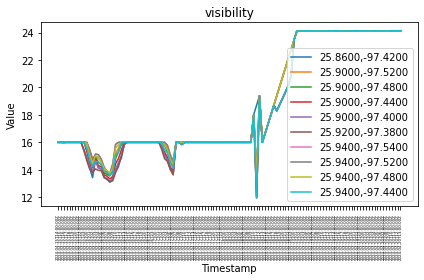

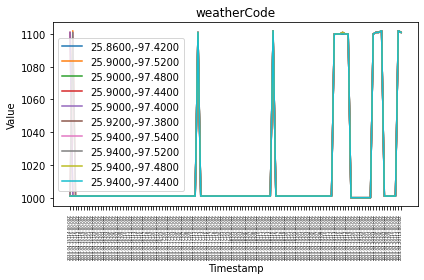

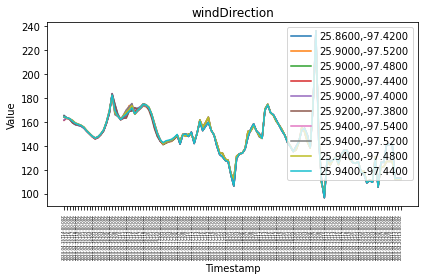

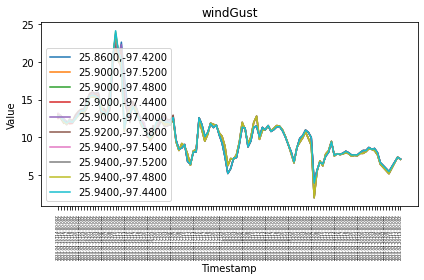

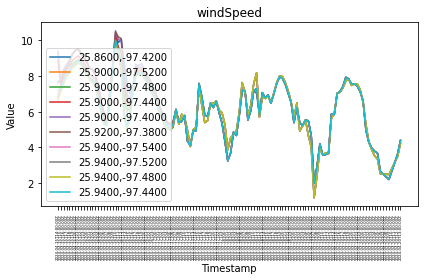

In [7]:
# Create a new chart for each metric
for metric in all_metrics:
    plt.figure()
    
    # Loop through each location and plot its data for the current metric
    for location, location_data in hourly_metrics_for_locations.items():
        if metric in location_data:
            timestamps = [entry['timestamp'] for entry in location_data[metric]]
            values = [entry['value'] for entry in location_data[metric]]
            plt.plot(timestamps, values, label=location)  # Plot location's data for the metric

    # Customize chart
    plt.title(metric)
    plt.xlabel('Timestamp')
    plt.ylabel('Value')
    plt.legend()
    plt.xticks(rotation=90, fontsize=4)
    plt.tight_layout()

    # Show or save chart
    plt.show()  # Display the chart